# Introduction

This lab will illustrate differences between a kernel ridge regression and a Gaussian process regression and how they are used to fit a dataset. We will also focus on tuning the kernel hyperparameters.

# Generating a dataset

We create a synthetic dataset. The true generative process will take a 1-D vector and compute its sine.

In [1]:
import numpy as np

rng = np.random.RandomState(0)
data = np.linspace(0, 30, num=1_000).reshape(-1, 1)
target = np.sin(data).ravel()

training_sample_indices = rng.choice(np.arange(0, 400), size=40, replace=False)
training_data = data[training_sample_indices]
training_noisy_target = target[training_sample_indices] + 0.5 * rng.randn(
    len(training_sample_indices)
)

# Limitations of a simple linear model

We fit a Ridge model and check the predictions of this model on our dataset.

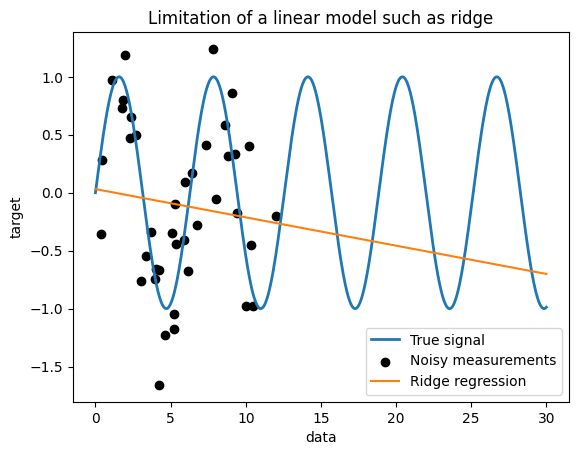

In [2]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

ridge = Ridge().fit(training_data, training_noisy_target)

plt.plot(data, target, label="True signal", linewidth=2)
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
plt.plot(data, ridge.predict(data), label="Ridge regression")
plt.legend()
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title("Limitation of a linear model such as ridge")

# Kernel methods: kernel ridge and Gaussian process

## Kernel ridge

We use a **KernelRidge** with an **ExpSineSquared** kernel which allows recovering the periodicity.

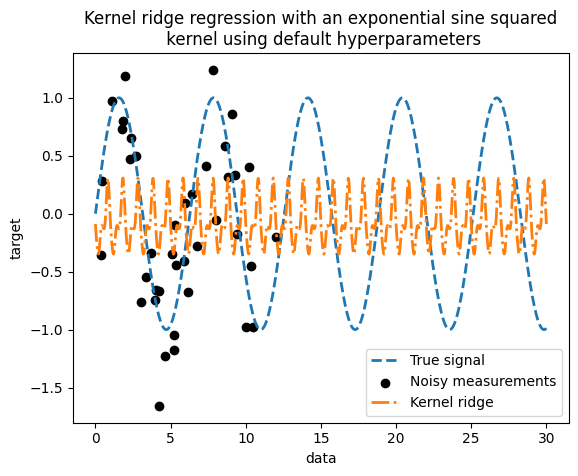

In [3]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process.kernels import ExpSineSquared

kernel_ridge = KernelRidge(kernel=ExpSineSquared())

kernel_ridge.fit(training_data, training_noisy_target)

plt.plot(data, target, label="True signal", linewidth=2, linestyle="dashed")
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
plt.plot(
    data,
    kernel_ridge.predict(data),
    label="Kernel ridge",
    linewidth=2,
    linestyle="dashdot",
)
plt.legend(loc="lower right")
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title(
    "Kernel ridge regression with an exponential sine squared\n "
    "kernel using default hyperparameters"
)

## Gaussian process regression

We use a **GaussianProcessRegressor** to fit the same dataset. When training a Gaussian process, the hyperparameters of the kernel are optimized during the fitting process.

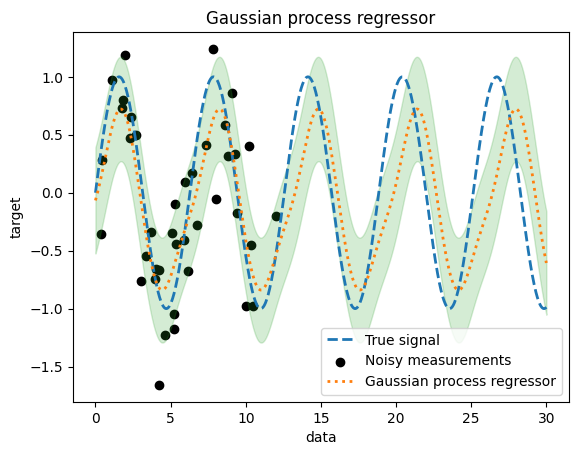

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel

kernel = 1.0 * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) + WhiteKernel(
    1e-1
)
gaussian_process = GaussianProcessRegressor(kernel=kernel)

gaussian_process.fit(training_data, training_noisy_target)

mean_predictions_gpr, std_predictions_gpr = gaussian_process.predict(
    data, return_std=True,
)

plt.plot(data, target, label="True signal", linewidth=2, linestyle="dashed")
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
plt.plot(
    data,
    mean_predictions_gpr,
    label="Gaussian process regressor",
    linewidth=2,
    linestyle="dotted",
)
plt.fill_between(
    data.ravel(),
    mean_predictions_gpr - std_predictions_gpr,
    mean_predictions_gpr + std_predictions_gpr,
    color="tab:green",
    alpha=0.2,
)
plt.legend(loc="lower right")
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title("Gaussian process regressor")

# Final conclusion

We can give a final word regarding the possibility of the two models to extrapolate. We observe that the models will continue to predict the sine pattern.

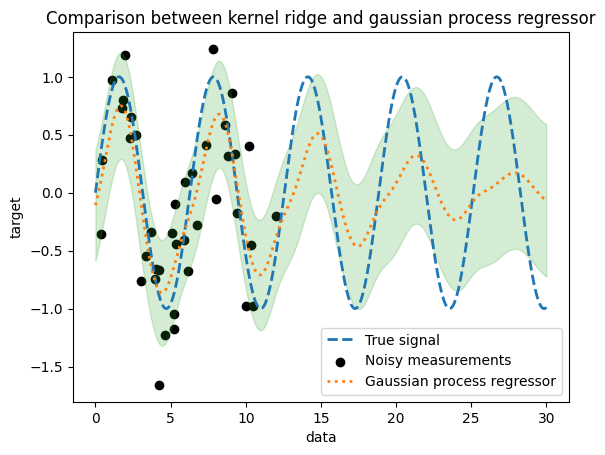

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel

kernel = 1.0 * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) * RBF(
    length_scale=15, length_scale_bounds="fixed"
) + WhiteKernel(1e-1)
gaussian_process = GaussianProcessRegressor(kernel=kernel)

gaussian_process.fit(training_data, training_noisy_target)

mean_predictions_gpr, std_predictions_gpr = gaussian_process.predict(
    data, return_std=True,
)

plt.plot(data, target, label="True signal", linewidth=2, linestyle="dashed")
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
plt.plot(
    data,
    mean_predictions_gpr,
    label="Gaussian process regressor",
    linewidth=2,
    linestyle="dotted",
)
plt.fill_between(
    data.ravel(),
    mean_predictions_gpr - std_predictions_gpr,
    mean_predictions_gpr + std_predictions_gpr,
    color="tab:green",
    alpha=0.2,
)
plt.legend(loc="lower right")
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title("Comparison between kernel ridge and gaussian process regressor")

# Summary

In this lab, we have compared kernel ridge regression and Gaussian process regression. We have learned that the Gaussian process regressor provide an uncertainty information that is not available with a kernel ridge. Gaussian process allows to combine kernels together.